In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
import xgboost as xgb

# Data Preperation

In [91]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('data.csv', delimiter=';')

# Display the first few rows of the DataFrame
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [92]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [93]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [94]:
df = df.drop_duplicates()

In [95]:
removeColumns = ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Admission grade"]
df = df.drop(columns=removeColumns)

df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Displaced,Educational special needs,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,1,0,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,0,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,1,0,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,1,0,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,0,0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,0,0,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,0,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,1,0,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,1,0,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [96]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Standardization (Z-score normalization)
standard_scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_columns] = standard_scaler.fit_transform(df_scaled[numerical_columns])

df_scaled

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Displaced,Educational special needs,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,-0.294829,-0.095470,2.490896,-4.209520,0.350082,-0.35023,-0.804841,-0.126298,0.907512,-0.107993,...,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,Dropout
1,-0.294829,-0.209869,-0.554068,0.192580,0.350082,-0.35023,2.076819,-0.126298,0.907512,-0.107993,...,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199,Graduate
2,-0.294829,-1.010660,2.490896,0.103404,0.350082,-0.35023,-0.804841,-0.126298,0.907512,-0.107993,...,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,Dropout
3,-0.294829,-0.095470,0.207173,0.444115,0.350082,-0.35023,-0.804841,-0.126298,0.907512,-0.107993,...,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,Graduate
4,1.356212,1.162916,-0.554068,-0.408389,-2.856470,-0.35023,-2.473171,-0.126298,-1.101914,-0.107993,...,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.294829,-1.010660,3.252137,0.444115,0.350082,-0.35023,-0.577342,-0.126298,-1.101914,-0.107993,...,-0.282442,-0.105726,-0.016033,0.187165,0.467631,-0.199441,1.476924,1.137005,-1.789667,Graduate
4420,-0.294829,-1.010660,0.207173,0.444115,0.350082,-0.35023,-0.956508,14.916228,0.907512,-0.107993,...,-0.282442,-0.105726,-0.522682,-0.808050,0.147747,-0.199441,-0.175007,-0.454253,0.889126,Dropout
4421,-0.294829,-1.010660,-0.554068,0.311805,0.350082,-0.35023,1.621820,-0.126298,0.907512,-0.107993,...,-0.282442,0.805144,0.237291,-1.139788,0.627573,-0.199441,0.876222,-1.105222,0.347199,Dropout
4422,-0.294829,-1.010660,-0.554068,0.140722,0.350082,-0.35023,3.593483,-0.126298,0.907512,-0.107993,...,-0.282442,-0.561161,-0.522682,0.187165,0.339678,-0.199441,-0.813253,-1.466871,-1.375511,Graduate


# EDA

In [97]:
df_scaled.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Displaced,Educational special needs,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,...,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03
mean,-4.553320e-16,-2.380179e-16,1.981035e-16,1.984800e-16,-5.359637e-16,4.255437e-16,-4.510156e-16,1.512754e-16,-9.300376e-17,-2.195413e-16,...,-4.772027e-16,-1.452726e-15,5.063542e-16,-1.765716e-16,-1.805618e-16,-5.071039e-16,-6.568736e-17,-2.300752e-16,2.188324e-16,8.944021e-17
std,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,...,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00
min,-2.948287e-01,-1.010660e+00,-1.315309e+00,-4.276402e+00,-2.856470e+00,-3.502305e-01,-2.852337e+00,-1.262982e-01,-1.101914e+00,-1.079929e-01,...,-1.992730e-01,-2.824423e-01,-2.838337e+00,-2.042630e+00,-1.471527e+00,-1.963489e+00,-1.994410e-01,-1.489043e+00,-1.466871e+00,-1.789667e+00
25%,-2.948287e-01,-1.010660e+00,-5.540678e-01,1.106740e-01,3.500825e-01,-3.502305e-01,-5.773417e-01,-1.262982e-01,-1.101914e+00,-1.079929e-01,...,-1.992730e-01,-2.824423e-01,-5.611611e-01,-5.226824e-01,-8.080500e-01,9.976438e-02,-1.994410e-01,-8.132529e-01,-6.712423e-01,-7.498721e-01
50%,-2.948287e-01,-9.547022e-02,-5.540678e-01,1.848259e-01,3.500825e-01,-3.502305e-01,3.690696e-02,-1.262982e-01,9.075119e-01,-1.079929e-01,...,-1.992730e-01,-2.824423e-01,-1.057260e-01,-1.603320e-02,1.871653e-01,3.780636e-01,-1.994410e-01,-1.750068e-01,1.243865e-01,1.401217e-01
75%,-2.948287e-01,1.162916e+00,2.071732e-01,3.389454e-01,3.500825e-01,-3.502305e-01,5.601559e-01,-1.262982e-01,9.075119e-01,-1.079929e-01,...,-1.992730e-01,-2.824423e-01,3.497091e-01,4.906160e-01,5.189037e-01,5.955849e-01,-1.994410e-01,8.762221e-01,9.923451e-01,7.877904e-01
max,7.960376e+00,2.192505e+00,5.535860e+00,5.497694e-01,3.500825e-01,3.761194e+00,4.351815e+00,1.549479e+01,9.075119e-01,9.259865e+00,...,1.717184e+01,9.622009e+00,7.636671e+00,6.317081e+00,5.163242e+00,1.600935e+00,1.572225e+01,1.739731e+00,1.787974e+00,1.545607e+00


C:\Users\User\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\Users\User\anaconda3\lib\site-packages\seaborn\utils.py:660: UserWarning: Glyph 9 (	) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


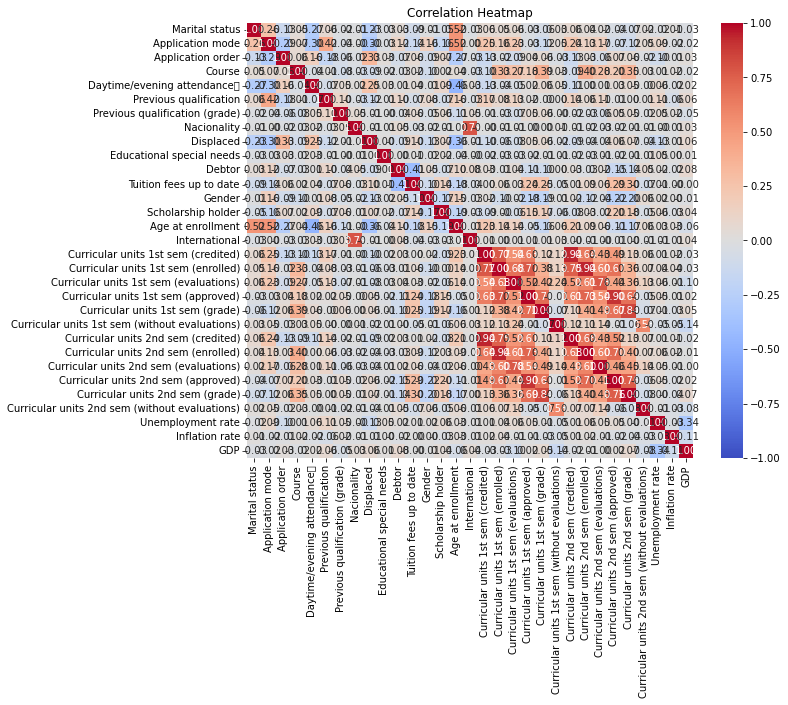

In [98]:
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

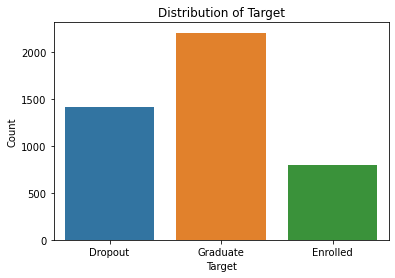

In [99]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=df)
plt.title('Distribution of Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

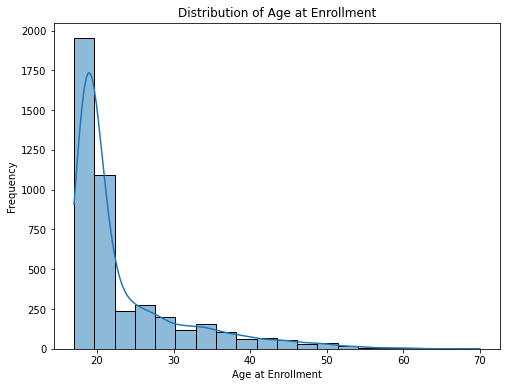

In [100]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age at enrollment'], bins=20, kde=True)
plt.title('Distribution of Age at Enrollment')
plt.xlabel('Age at Enrollment')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

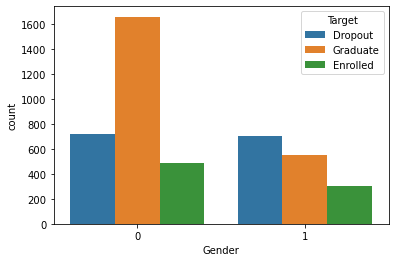

In [101]:
sns.countplot(x=df['Gender'], hue=df['Target'])

- In Gender 0, the 'Graduate' category has a significantly high count compared to Gender 1.
- 'Dropout' counts seem consistent between the two genders.
- Gender 0 seems to have more individuals in the 'Enrolled' category compared to Gender 1. 

<AxesSubplot:xlabel='Scholarship holder', ylabel='count'>

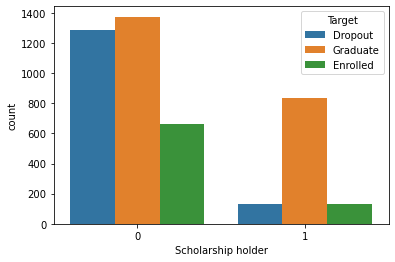

In [102]:
sns.countplot(x=df['Scholarship holder'], hue=df['Target'])

0 = Non-scholarship holders 1 = Scholarship holders

It can be seen that non-scholarship holders have more graduates than scholarship holders. However, they also have a pretty significantly high dropouts too.
However, scholarship holders tends to have fewer dropouts than non-scholarship holders. 

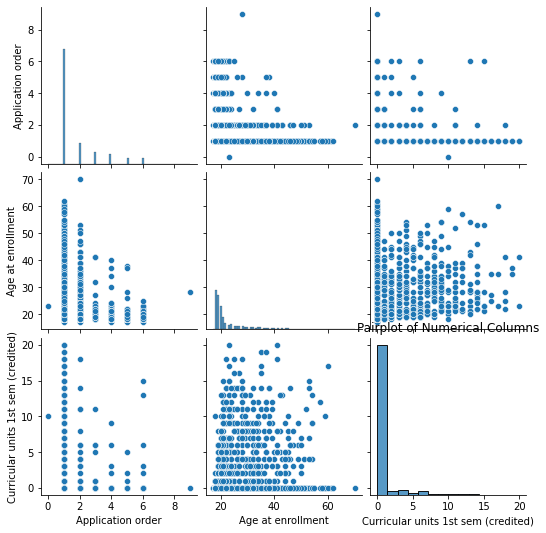

In [103]:
import seaborn as sns

# Define numerical columns for pairplot
numerical_cols_for_pairplot = ['Application order', 'Age at enrollment', 'Curricular units 1st sem (credited)']

# Create pairplot for the selected numerical columns
sns.pairplot(df[numerical_cols_for_pairplot])
plt.title('Pairplot of Numerical Columns')
plt.show()

# Clustering

### K-Means 

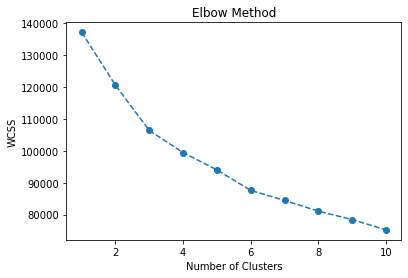

In [104]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

numerical_columns = df_scaled.select_dtypes(include=['float64', 'int64'])

wcss = []
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(numerical_columns)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

In [105]:
from sklearn.cluster import KMeans

# Assuming 'data_standardized' contains your scaled data
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df[numerical_columns])

# Adding a new column 'Cluster' to your original DataFrame to store the cluster labels
df['Cluster'] = kmeans.labels_

# Displaying the counts of samples in each cluster
print(df['Cluster'].value_counts())

0    2286
2    1911
1     227
Name: Cluster, dtype: int64


### Hierarchical

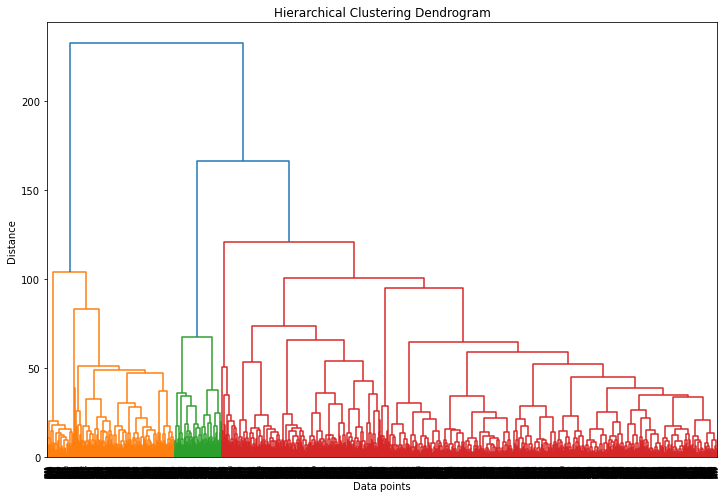

In [106]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Drop the 'Target' column before scaling and clustering
target_column = df_scaled['Target']  # Save the target column for later use
df_scaled = df_scaled.drop('Target', axis=1)  # Drop the non-numeric column

# Identify categorical columns if any and apply one-hot encoding
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

if categorical_cols:
    # Use ColumnTransformer to scale numerical columns and one-hot encode categorical columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), data.columns),
            ('cat', OneHotEncoder(), categorical_cols)
        ],
        remainder='passthrough'
    )

    scaled_data = preprocessor.fit_transform(data)
else:
    # If there are no categorical columns, only scale numerical columns
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_scaled)
data['KMeans_Cluster'] = kmeans.labels_

# Hierarchical clustering
# Using Ward's linkage method for hierarchical clustering
Z = linkage(scaled_data, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

In [107]:
cluster_summary = data.groupby('KMeans_Cluster').mean()

# Display the summary statistics for each cluster
cluster_summary

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Displaced,Educational special needs,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Cluster,KMeans Cluster,cluster
KMeans_Cluster,,,,,,,,,,,,,,,,,,,,,
0,1.303571,33.042857,1.132143,7986.475000,0.721429,9.517857,131.971429,1.778571,0.389286,0.000000,...,14.492857,9.910714,12.654533,0.292857,11.249643,1.393214,0.012071,0.614286,1.000000,1.000000
1,1.146925,16.326265,1.820055,9327.887610,0.913057,4.106331,132.675220,1.879733,0.581036,0.012118,...,8.636171,5.083308,12.491950,0.102090,11.584732,1.185974,0.067937,0.966677,0.991215,0.991215
2,1.260973,23.068802,1.564650,7300.376038,0.860024,4.782918,132.584104,1.879004,0.473310,0.013049,...,3.684460,0.081851,0.568486,0.291815,11.598458,1.337841,-0.259703,0.813760,0.000000,0.000000


# Prediction Model using Classification Algorithm

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder

df['Target'] = label_encoder.fit_transform(df['Target'])

y = df['Target']  # Replace 'Target' with your actual target column name

# Drop the target variable from the features to create the feature set X
X = df.drop('Target', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}, Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

Model: Logistic Regression, Accuracy: 0.7593220338983051
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       316
           1       0.49      0.29      0.37       151
           2       0.77      0.92      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.74      0.76      0.74       885

Model: Decision Tree, Accuracy: 0.6836158192090396
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       316
           1       0.35      0.38      0.37       151
           2       0.76      0.79      0.78       418

    accuracy                           0.68       885
   macro avg       0.62      0.62      0.62       885
weighted avg       0.69      0.68      0.69       885

Model: Random Forest, Accuracy: 0.7615819209039548
              precision    recall  f1-score   support

           0       0.85 

  Terlihat bahwa model seperti Random Forest, XGBoost dan Logistic Regression memberikan hasil yang cukup baik dibandingkan dengan model lainnya. Tingkat akurasi tertinggi dibuat oleh Random Forest dengan tingkat akurasi 0.76. Random Forest juga memiliki nilai presisi dan recall yang cukup baik untuk kelas 0 dan 2, namun lebih rendah untuk kelas 1. XGBoost dan Logistic Regression juga menunjukkan tingakt akurasi yang baik, yaitu kisaran 0.75 untuk keduanya. Keduanya juga memiliki nilai presisi dan recall yang baik untuk kelas 0 dan 2, namun rendah untuk kelas 1. 
  
  Pemilihan model tergantung pada kebutuhan spesifik aplikasi, namun Random Forest menjadi pilihan utama untuk prediksi yang akurat terkait prediksi akademik mahasiswa berdasarkan hasil pengujian ini.